<a href="https://colab.research.google.com/github/amara-deepika/wool_quality/blob/main/prediction_wool_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("Book3.csv")
df.head()


,FINENESS,LENGTH,COLOR,TARGET
0,34.10,80,0,0
1,33.83,84,0,0
2,34.12,81,0,0
3,30.83,86,0,0
4,31.35,86,0,0


<Axes: xlabel='TARGET', ylabel='count'>

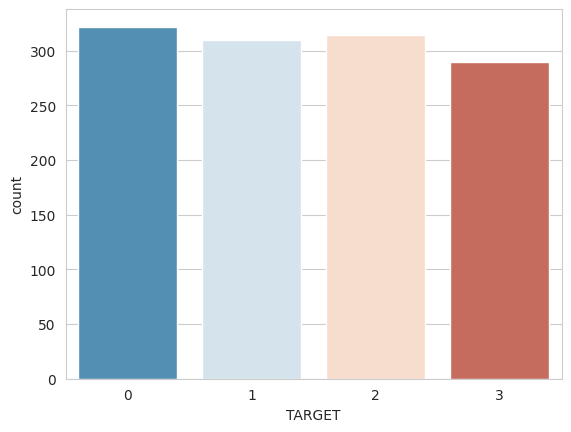

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='TARGET',data=df,palette='RdBu_r')

<Axes: >

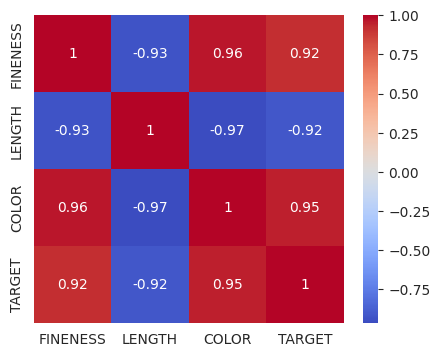

In [ ]:
corr = df.corr()
fig= plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')#annot -> displays the matrix values inside the box

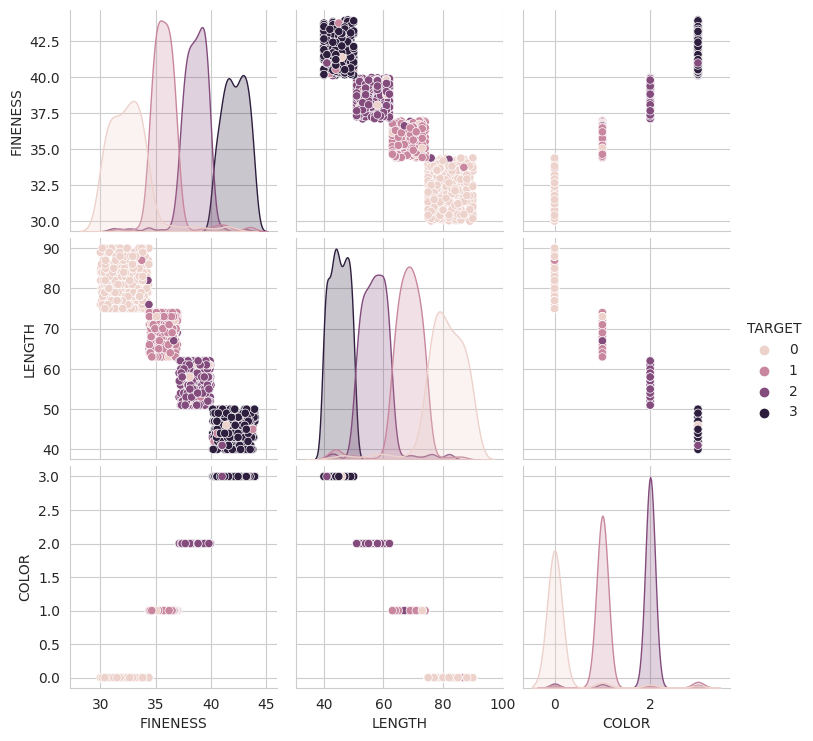

In [ ]:
sns.pairplot(df,hue='TARGET')

In [ ]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
data=df.values
X=data[:,0:3]#array
Y=data[:,3]

#Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Text(0, 0.5, 'Error Rate')

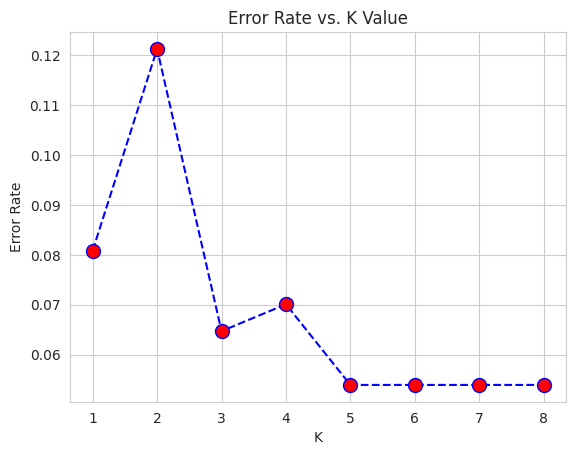

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
error_rate = []#error list

# Will take some time
for i in range(1,9):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))## gives the error rate
plt.plot(range(1,9),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)# k value->range
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
prediction1=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(type(y_test))
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)
for i in range(45):
  print(y_test[i],prediction1[i]) #indexing works for arrays and not for series

<class 'numpy.ndarray'>
Accuracy:  94.60916442048517
1.0 1.0
3.0 3.0
1.0 1.0
1.0 1.0
2.0 2.0
1.0 1.0
2.0 2.0
0.0 0.0
3.0 3.0
1.0 1.0
0.0 0.0
1.0 1.0
3.0 3.0
1.0 1.0
2.0 2.0
1.0 3.0
2.0 2.0
0.0 1.0
0.0 0.0
0.0 0.0
2.0 2.0
1.0 1.0
0.0 2.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
2.0 2.0
2.0 2.0
0.0 0.0
0.0 0.0
2.0 2.0
3.0 3.0
1.0 1.0
0.0 0.0
0.0 0.0
2.0 2.0
3.0 3.0
3.0 3.0
1.0 1.0
0.0 0.0
1.0 1.0
2.0 2.0
0.0 2.0


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred_i = knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_i))
print("\n")
print(classification_report(y_test,pred_i))

[[77  4  5  1]
 [ 4 98  1  3]
 [ 2  0 89  2]
 [ 1  1  0 83]]


              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        87
         1.0       0.95      0.92      0.94       106
         2.0       0.94      0.96      0.95        93
         3.0       0.93      0.98      0.95        85

    accuracy                           0.94       371
   macro avg       0.93      0.94      0.93       371
weighted avg       0.94      0.94      0.94       371



In [ ]:
x_new=np.array([[75,43,0]])
predict=knn.predict(x_new)
print(predict)
output={0:"CATEGORY A",1:"CATEGORY B",2:"CATEGORY C",3:"CATEGORY D"}
for i in predict:
  print(output[i])

[3.]
CATEGORY D
